In [1]:
import nltk
import spacy
import numpy as np
import pandas as pd

# following line is optional for custom vocabulary installation
# you can use nlp = spacy.load('en')
# nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

In [14]:
nlp = spacy.load('en_core_web_sm')

## Language Syntax and Structure

In [2]:
sentence = "The brown fox is quick and he is jumping over the lazy dog"
sentence

'The brown fox is quick and he is jumping over the lazy dog'

### Structured sentence following the hierarchical syntax

**Clauses** are connected through various filler terms or words like *conjunctions* and they form the final sentence.

In [3]:
words = sentence.split()
np.random.shuffle(words)
print(words)

['fox', 'and', 'brown', 'is', 'over', 'quick', 'the', 'jumping', 'he', 'is', 'lazy', 'dog', 'The']


### Words -- the smallest unit in a language; independent & have a meaning of their own

> Although *morphemes* are the **smallest distinctive** units, they are not independent like words. A word can be comprised of several morphemes.

It is useful to **annotate** and **tag** words and then analyze them into their `parts of speech (POS)` to see the major syntactic categories. 

- Major POS tags include **N(oun), V(erb), Adj(ective), Adv(erb)**. 
- Each POS tag, like *nouns(N)* can be further subdivided into: singular nouns (NN), singular proper nouns (NNP), & plural nouns (NNS).

In Python, we can leverage `NLTK` or `spaCy` to process, parse textual data and annotate text with POS tags.

In [6]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
pos_tags = nltk.pos_tag(sentence.split())
pd.DataFrame(pos_tags).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN


In [15]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in nlp(sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,The,brown,fox,is,quick,and,he,is,jumping,over,the,lazy,dog
1,DT,JJ,NN,VBZ,JJ,CC,PRP,VBZ,VBG,IN,DT,JJ,NN
2,DET,ADJ,NOUN,AUX,ADJ,CCONJ,PRON,AUX,VERB,ADP,DET,ADJ,NOUN


- The tag `DET` stands for *determiner* --> used to depict articles like a, an, the, etc.
- The tag `CONJ` indicates a *conjunction* --> bind togther clauses to form sentences
- The tag `PRON` stands for *pronoun* --> words that represent or take the place of a noun.

### Phrases -- made up by groups of words, which form the third level in the syntax tree

Words have their own lexical properties like POS. We can order words in ways that give meaning to the words such that each word belongs to a corresponding **phrasal category** and one of the words is the *main or head word*. 

#### Five major syntactic categories of phrases:


- **Noun phrase (NP)**
    - phrases where a *noun* acts as the head word.
    - NPs act as a subject or object to a verb.
    - e.g. *"dessert"*, *"the lazy dog"*


- **Verb phrase (VP)**
    - these phrases are lexical units that have a *verb* acting as the head word.
    - Form 1 -- in **constituency grammars**: verb component + other entities like N, adj., adv.
        - e.g. *"has started the engine"* in the sentence of *"He has started the engine."*
    - Form 2 -- in **dependency grammars**: verb component only `(where the finite verb acts as the root of the entire clause)`
        - e.g. *"has started"*

- **Adjective phrase (ADJP)**
    - head word: adj
    - to describe or qualify nouns and pronouns in a sentence
        - e.g. The sentence *"The cat is too quick"* has an ADJP, *"too quick"*, qualifying the cat, a noun phrase.

- **Adverb phrase (ADVP)**
    - used as modifiers for nouns, verbs, or adverbs by providing futher details to describe or qualify them
        - e.g. The sentence *"The train should be at the station pretty soon"*, the ADVP is *"pretty soon"* that describes when the train will be arriving.

- **Prepositional phrase (PP)**
    - head word: preposition like up, down, etc.
    - act like an adj/adv describing other words/phrases
        - The sentence *"Going up the stairs"* has a PP, *"up"*, describing the direction of the stairs.

#### Shallow parsing -- a popular NLP technique used to extract constituents including POS tags and phrases from a sentence.

We can define our own rules for phrases and then enable `shallow parsing` or `chunking` using a lookup based parser similar to the `NLTK`'s `RegexpParser`.

- a *grammar based chunk parser* and uses a set of *regular expression patterns* (defined grammar rules) to specify the behavior of the parser.

In [16]:
pos_tagged_sent = nltk.pos_tag(sentence.split())

grammar = '''
            NP: {<DT>?<JJ>?<NN.*>}  
            ADJP: {<JJ>}
            ADVP: {<RB.*>}
            PP: {<IN>}      
            VP: {<MD>?<VB.*>+}
          '''

In [18]:
rp = nltk.RegexpParser(grammar)
shallow_parsed_sent = rp.parse(pos_tagged_sent)
print(shallow_parsed_sent)

(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))


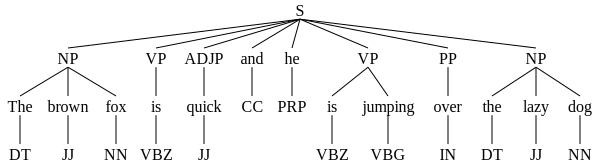

In [20]:
# visualize shallow parse tree
shallow_parsed_sent

### Clauses -- usually contain a subject + predicate

By nature, clauses can act as independent sentences or several clauses can be combined together to form a sentence.

By default you can classify clauses into two distinct categories:

1. **Main Clause** (An independent clause) 
    - can form a sentence by itself & act as both a sentence and a clause

2. **Subordinate Clause** (Depdendent clause) 
    - cannot exist by itself / depends on the main clause for its meaning

#### Categories of clauses based on syntax

![](../../pics/clause_category.png)

### Grammar -- helps enable syntax & structure in language

- consisting of a set of rules used to determine how to position words, phrases, and clauses when constructing sentences into a natural language

- not a fixed set of rules but evolves based on language use over the course of time

#### Grammar can be subdivided into two main classes based on its representations for linguistic syntax and structure.

##### 1. Dependency Grammar -- word-based grammars

**Dependencies** in this context are labeled *word-word relations* or links that are usually asymmetrical.

- A word has a relation or depends on another word based on the *positioning* of the words in the sentence.

- All words except one (the *root* of the sentence) has some relationship or dependency on other words in the sentence.

    - the `verb` is taken as the *root* of the sentence in most cases. All other words are directly or indirectly linked to the root verb using links, which are **dependencies**.

> Dependency grammar always have 1-1 relationship to each word in the sentence.

- The dependency tree is a `directed acyclic graph (DAG)` 

    - directed -- each edge between two words points in one specific direction

    - Every node has <= 1 incoming edge except the root node.

    - Each directed edge represents a specific type of meaningful relationship (also known as `syntactic function`) & we can annotate our sentence to show the specific *dependency relationship types* between words.

    - Check out the exhaustive list of dependency types and their meanings at [UniversalDependencies.org](https://universaldependencies.org/u/dep/index.html)

![](../../pics/dg.png)

#### Leverage spaCy to build dependency tree/graph

In [21]:
from spacy import displacy

displacy.render(nlp(sentence), jupyter=True, 
                options={'distance': 100,
                         'arrow_stroke': 1.5,
                         'arrow_width': 8})

##### 2. Constituency Grammar

#### Leverage Stanford's Core NLP-based parsers in NLTK to perform constituency parsing

Reference: [SYNTAX PARSING WITH CORENLP & NTLK by Benjamin Bengfort](https://www.districtdatalabs.com/syntax-parsing-with-corenlp-and-nltk)

[Stanford's CoreNLP library](https://stanfordnlp.github.io/CoreNLP/)

- This parser is a Java library, however, and requires Java 1.8 to be installed.

- It also comes with a server that can be run and accessed from Python using `NLTK 3.2.3` or later

 > Once you have downloaded the JAR files from the CoreNLP download page and installed Java 1.8 as well as pip installed NLTK, you can run the server as follows:

In [49]:
import os
from nltk.parse.corenlp import CoreNLPServer

# The server needs to know the location of the following files:
#   - stanford-corenlp-X.X.X.jar
#   - stanford-corenlp-X.X.X-models.jar

STANFORD = '/Users/jiner/Downloads/stanford-corenlp-4.5.1'

# Create the server
server = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.5.1.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.5.1-models.jar"),    
)

# Start the server in the background
server.start()

In [50]:
from nltk.parse.corenlp import CoreNLPParser
parser = CoreNLPParser()

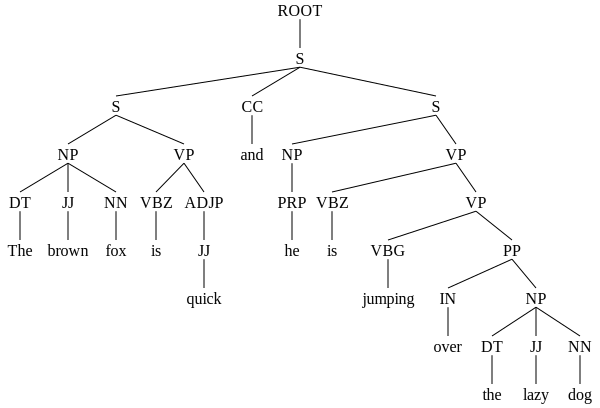

In [53]:
parse = parser.raw_parse(sentence)
next(parse)

> Once you’re done parsing, don’t forget to **stop the server**!

In [60]:
# Stop the CoreNLP server
server.stop()

### Word-Order Typology

*Typology* in linguistic -- a field specifically deals with trying to *classify language based on their syntax, structure, and functionality*.

- *word-order typology* (one of the most common models) -- classify them according to their **dominant word orders**

#### Language Semantics --> the study of meaning

In [41]:
# load the Brown Corpus
from nltk.corpus import brown

# total categories
print('Total Categories:', len(brown.categories()))

Total Categories: 15


In [42]:
# print the categories
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [43]:
# tokenized sentences
brown.sents(categories='mystery')

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [44]:
# POS tagged sentences
brown.tagged_sents(categories='mystery')

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

In [47]:
# get sentences in natural form
sentences = brown.sents(categories='mystery')
sentences = [' '.join(sentence_token) for sentence_token in sentences]
sentences[0:5] # viewing the first 5 sentences

['There were thirty-eight patients on the bus the morning I left for Hanover , most of them disturbed and hallucinating .',
 'An interne , a nurse and two attendants were in charge of us .',
 "I felt lonely and depressed as I stared out the bus window at Chicago's grim , dirty West Side .",
 'It seemed incredible , as I listened to the monotonous drone of voices and smelled the fetid odors coming from the patients , that technically I was a ward of the state of Illinois , going to a hospital for the mentally ill .',
 'I suddenly thought of Mary Jane Brennan , the way her pretty eyes could flash with anger , her quiet competence , the gentleness and sweetness that lay just beneath the surface of her defenses .']

In [48]:
# get tagged words
tagged_words = brown.tagged_words(categories='mystery')

# get nouns from tagged words
nouns = [(word, tag) for word, tag in tagged_words if any(noun_tag in tag for noun_tag in ['NP', 'NN'])]

nouns[0:10] # view the first 10 nouns

[('patients', 'NNS'),
 ('bus', 'NN'),
 ('morning', 'NN'),
 ('Hanover', 'NP'),
 ('interne', 'NN'),
 ('nurse', 'NN'),
 ('attendants', 'NNS'),
 ('charge', 'NN'),
 ('bus', 'NN'),
 ('window', 'NN')]

In [49]:
# build frequency distribution for nouns
nouns_freq = nltk.FreqDist([word for word, tag in nouns])

# view top 10 occuring nouns
nouns_freq.most_common(10)

[('man', 106),
 ('time', 82),
 ('door', 80),
 ('car', 69),
 ('room', 65),
 ('Mr.', 63),
 ('way', 61),
 ('office', 50),
 ('eyes', 48),
 ('Mrs.', 46)]

In [50]:
# load the Reuters Corpus
from nltk.corpus import reuters

# total categories
print('Total Categories:', len(reuters.categories()))

Total Categories: 90


In [51]:
# print the categories
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [52]:
# get sentences in housing and income categories
sentences = reuters.sents(categories=['housing', 'income'])
sentences = [' '.join(sentence_tokens) for sentence_tokens in sentences]
sentences[0:5]  # view the first 5 sentences

["YUGOSLAV ECONOMY WORSENED IN 1986 , BANK DATA SHOWS National Bank economic data for 1986 shows that Yugoslavia ' s trade deficit grew , the inflation rate rose , wages were sharply higher , the money supply expanded and the value of the dinar fell .",
 'The trade deficit for 1986 was 2 . 012 billion dlrs , 25 . 7 pct higher than in 1985 .',
 'The trend continued in the first three months of this year as exports dropped by 17 . 8 pct , in hard currency terms , to 2 . 124 billion dlrs .',
 'Yugoslavia this year started quoting trade figures in dinars based on current exchange rates , instead of dollars based on a fixed exchange rate of 264 . 53 dinars per dollar .',
 "Yugoslavia ' s balance of payments surplus with the convertible currency area fell to 245 mln dlrs in 1986 from 344 mln in 1985 ."]

In [53]:
# fileid based access
print(reuters.fileids(categories=['housing', 'income']))

['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665', 'test/18672', 'test/18911', 'test/19875', 'test/20106', 'test/20116', 'training/1035', 'training/1036', 'training/10602', 'training/10604', 'training/11170', 'training/11665', 'training/2618', 'training/29', 'training/3105', 'training/3708', 'training/3720', 'training/3723', 'training/3898', 'training/5883', 'training/5886', 'training/6000', 'training/6067', 'training/6197', 'training/7005', 'training/7006', 'training/7015', 'training/7036', 'training/7098', 'training/7099', 'training/9615']


In [54]:
print(reuters.sents(fileids=[u'test/16118', u'test/18534']))

[['YUGOSLAV', 'ECONOMY', 'WORSENED', 'IN', '1986', ',', 'BANK', 'DATA', 'SHOWS', 'National', 'Bank', 'economic', 'data', 'for', '1986', 'shows', 'that', 'Yugoslavia', "'", 's', 'trade', 'deficit', 'grew', ',', 'the', 'inflation', 'rate', 'rose', ',', 'wages', 'were', 'sharply', 'higher', ',', 'the', 'money', 'supply', 'expanded', 'and', 'the', 'value', 'of', 'the', 'dinar', 'fell', '.'], ['The', 'trade', 'deficit', 'for', '1986', 'was', '2', '.', '012', 'billion', 'dlrs', ',', '25', '.', '7', 'pct', 'higher', 'than', 'in', '1985', '.'], ...]


In [56]:
# load the Wordnet Corpus
from nltk.corpus import wordnet as wn

word = 'hike' # taking hike as our word of interest
# get word synsets
word_synsets = wn.synsets(word)
word_synsets

[Synset('hike.n.01'),
 Synset('rise.n.09'),
 Synset('raise.n.01'),
 Synset('hike.v.01'),
 Synset('hike.v.02')]

In [64]:
# get details for each synonym in synset
for synset in word_synsets:
    print(('Synset Name: {name}\n'
           'POS Tag: {tag}\n'
           'Definition: {defn}\n'
           'Examples: {ex}\n').format(name=synset.name(),
                                      tag=synset.pos(),
                                      defn=synset.definition(),
                                      ex=synset.examples()))
          

Synset Name: hike.n.01
POS Tag: n
Definition: a long walk usually for exercise or pleasure
Examples: ['she enjoys a hike in her spare time']

Synset Name: rise.n.09
POS Tag: n
Definition: an increase in cost
Examples: ['they asked for a 10% rise in rates']

Synset Name: raise.n.01
POS Tag: n
Definition: the amount a salary is increased
Examples: ['he got a 3% raise', 'he got a wage hike']

Synset Name: hike.v.01
POS Tag: v
Definition: increase
Examples: ['The landlord hiked up the rents']

Synset Name: hike.v.02
POS Tag: v
Definition: walk a long way, as for pleasure or physical exercise
Examples: ['We were hiking in Colorado', 'hike the Rockies']

